# Car_Price_Prediction

Step 1: Import Libraries


In [48]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.linear_model import LinearRegression


Step 2: Read Dataset


In [ ]:
#importing dataset
df = pd.read_csv('car_data.csv')
df.head().style.background_gradient(cmap = "autumn")

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.350000,5.590000,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.750000,9.540000,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.250000,9.850000,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.850000,4.150000,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.600000,6.870000,42450,Diesel,Dealer,Manual,0


In [50]:
df.shape

(301, 9)

In [51]:
print(df['Seller_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())

['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


Step 3: Dataset Overview
Dataset Basic Information:



In [52]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

Numerical Columns Description:



In [53]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [55]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [56]:
final_dataset = df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [57]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


Step 4: Data Preparation


In [58]:
final_dataset['Current_Year'] = 2023

In [59]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2023
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2023
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2023
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2023
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2023


In [60]:
final_dataset['Age'] = final_dataset['Current_Year']-final_dataset['Year']

In [61]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,Age
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2023,9
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2023,10
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2023,6
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2023,12
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2023,9


In [62]:
final_dataset.drop(['Year'],axis=1,inplace=True)


In [63]:
final_dataset.drop(['Current_Year'],axis=1,inplace=True)


In [64]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,9


In [65]:
print(df['Fuel_Type'].unique())

['Petrol' 'Diesel' 'CNG']


In [66]:
final_dataset=pd.get_dummies(final_dataset,drop_first=True)

In [67]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,9,False,True,False,True
1,4.75,9.54,43000,0,10,True,False,False,True
2,7.25,9.85,6900,0,6,False,True,False,True
3,2.85,4.15,5200,0,12,False,True,False,True
4,4.60,6.87,42450,0,9,True,False,False,True


In [68]:
final_dataset

,Selling_Price,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,9,False,True,False,True
1,4.75,9.54,43000,0,10,True,False,False,True
2,7.25,9.85,6900,0,6,False,True,False,True
3,2.85,4.15,5200,0,12,False,True,False,True
4,4.60,6.87,42450,0,9,True,False,False,True
...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,0,7,True,False,False,True
297,4.00,5.90,60000,0,8,False,True,False,True
298,3.35,11.00,87934,0,14,False,True,False,True
299,11.50,12.50,9000,0,6,True,False,False,True


In [69]:
final_dataset.corr(method ='pearson')

,Selling_Price,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
Age,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


In [70]:
%matplotlib inline 
#to display the plot directly below the code cell.

In [71]:
corrmat = df.corr(method='pearson', numeric_only=True)

In [72]:
corrmat.index

Index(['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner'], dtype='object')

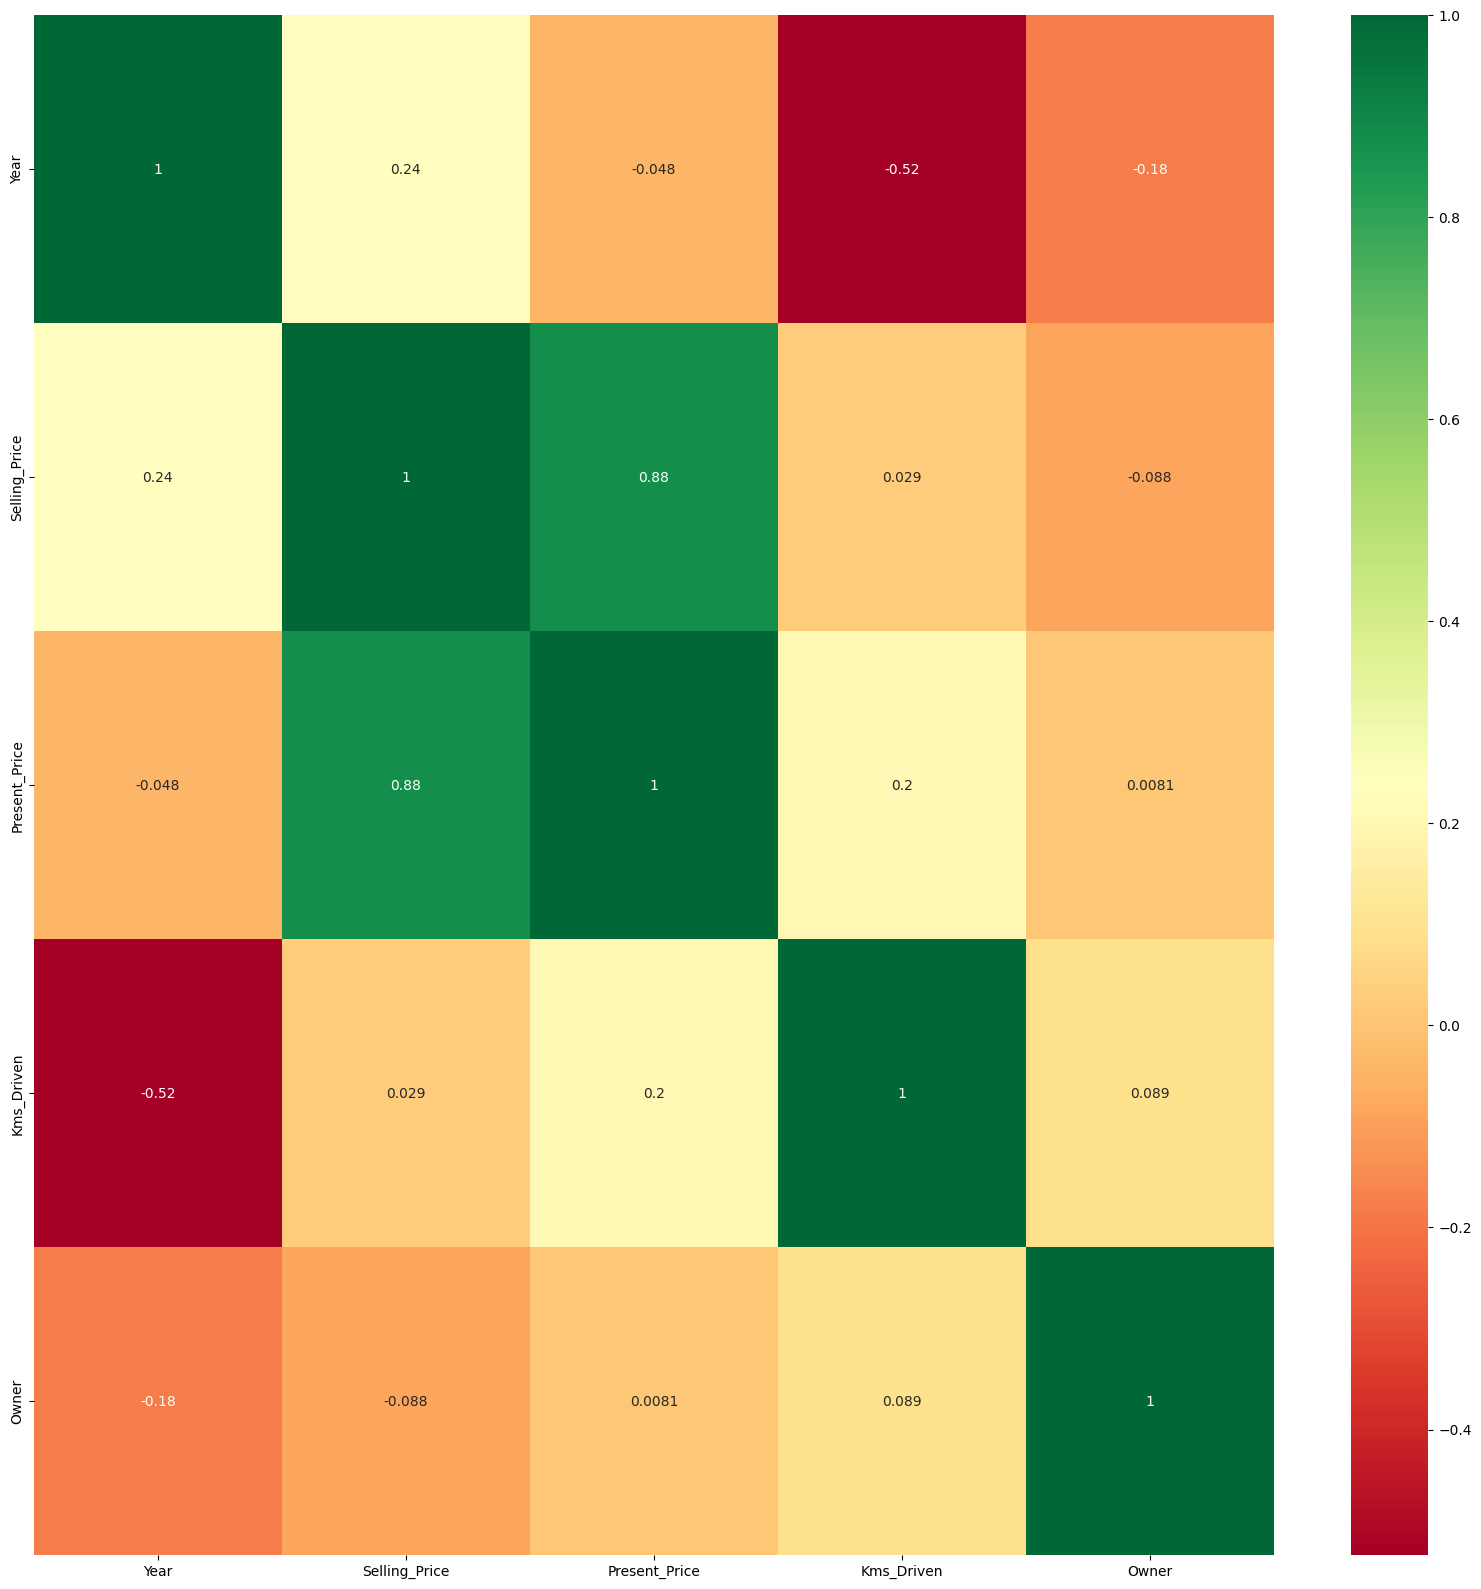

In [73]:
corrmat = df.corr(method='pearson', numeric_only=True)
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_corr_features].corr(method='pearson'),annot=True,cmap="RdYlGn")


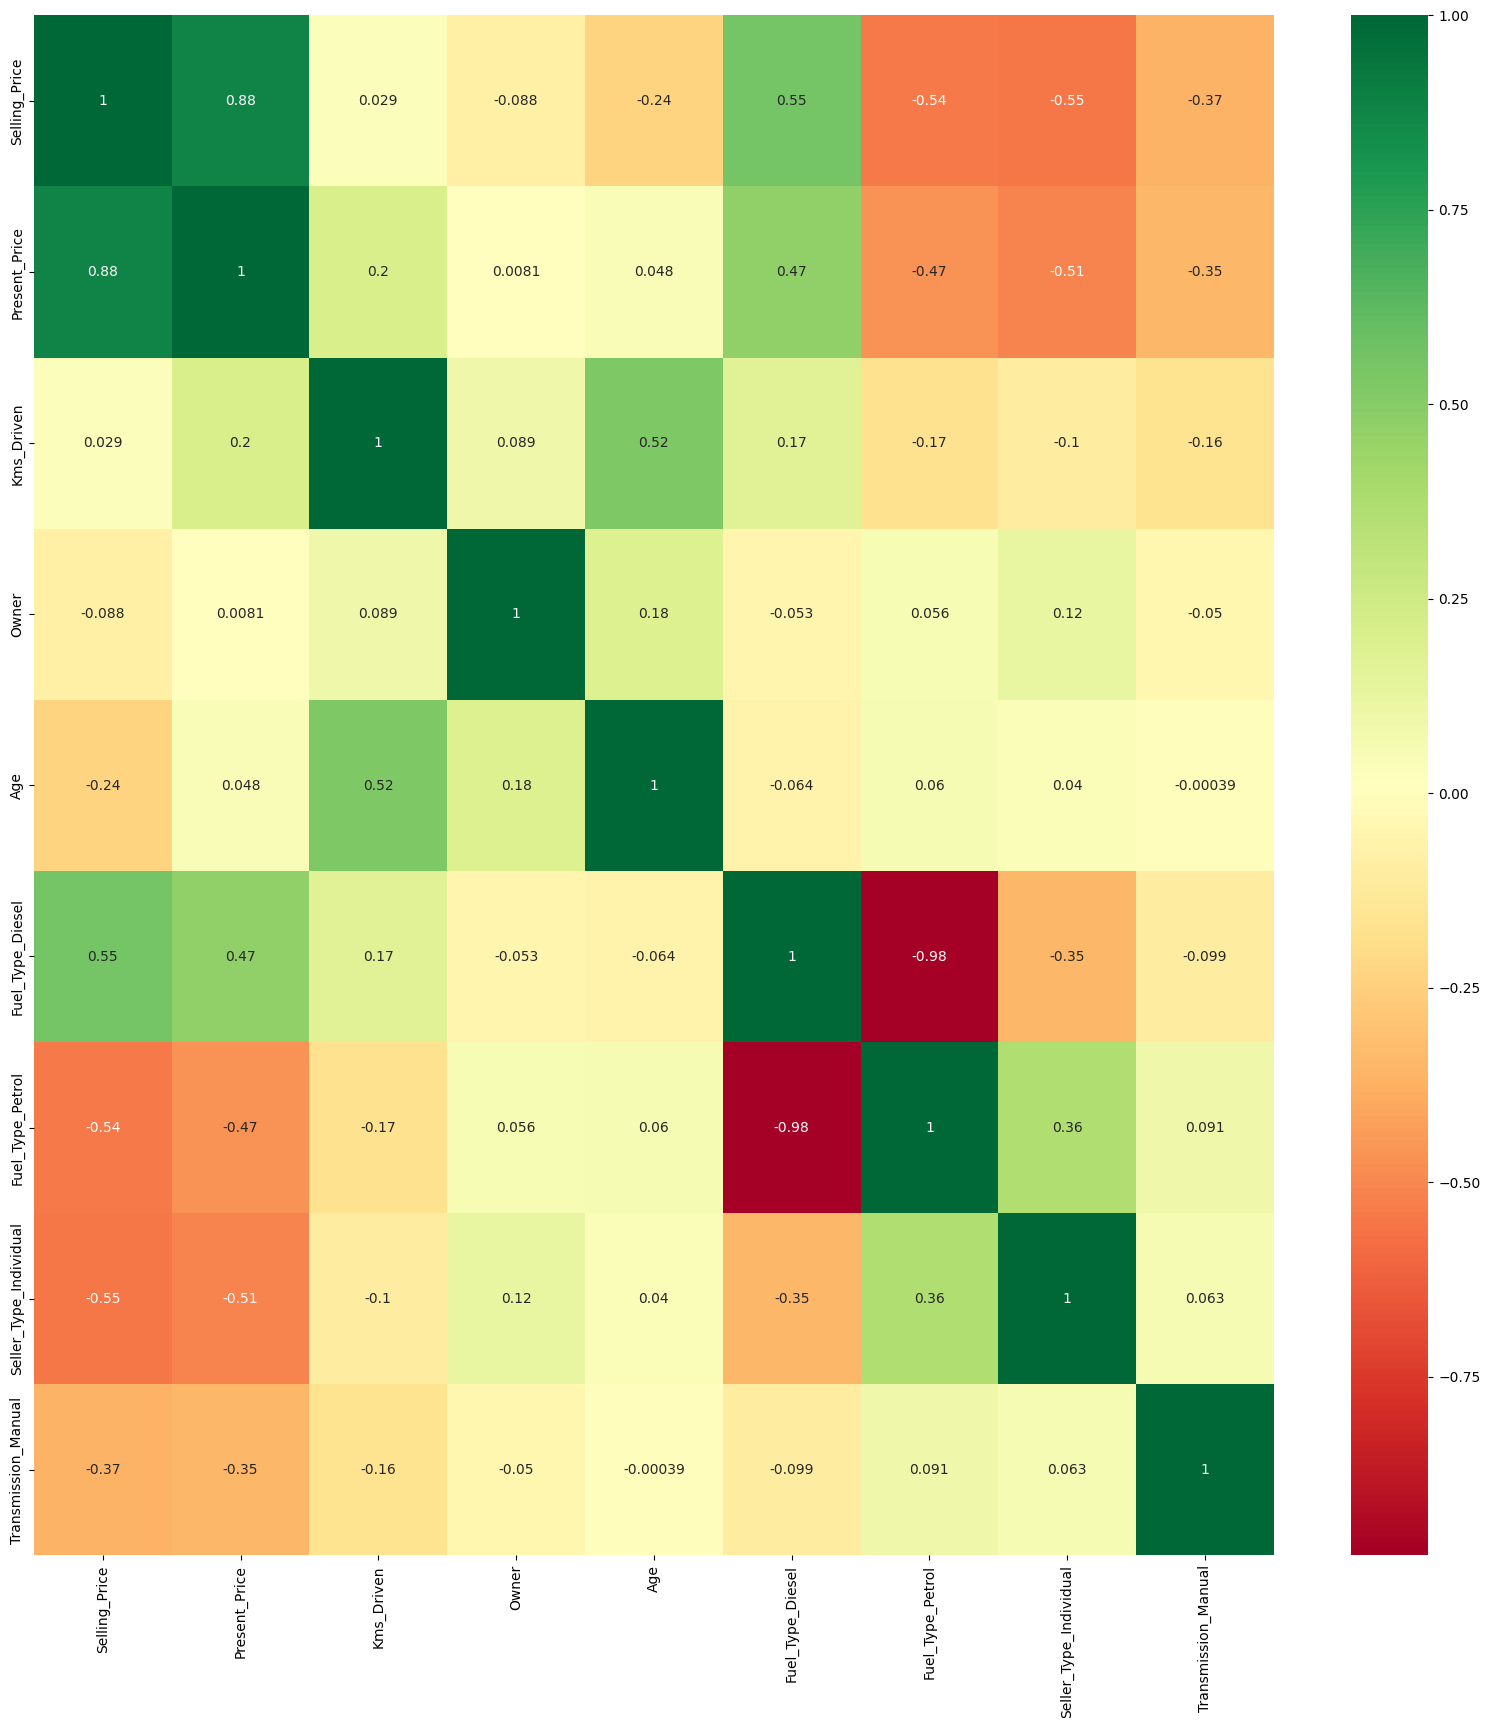

In [74]:
corrmat = final_dataset.corr(method='pearson')
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(final_dataset[top_corr_features].corr(method='pearson'),annot=True,cmap="RdYlGn")

/Users/mehmetomer/Library/Python/3.9/lib/python/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


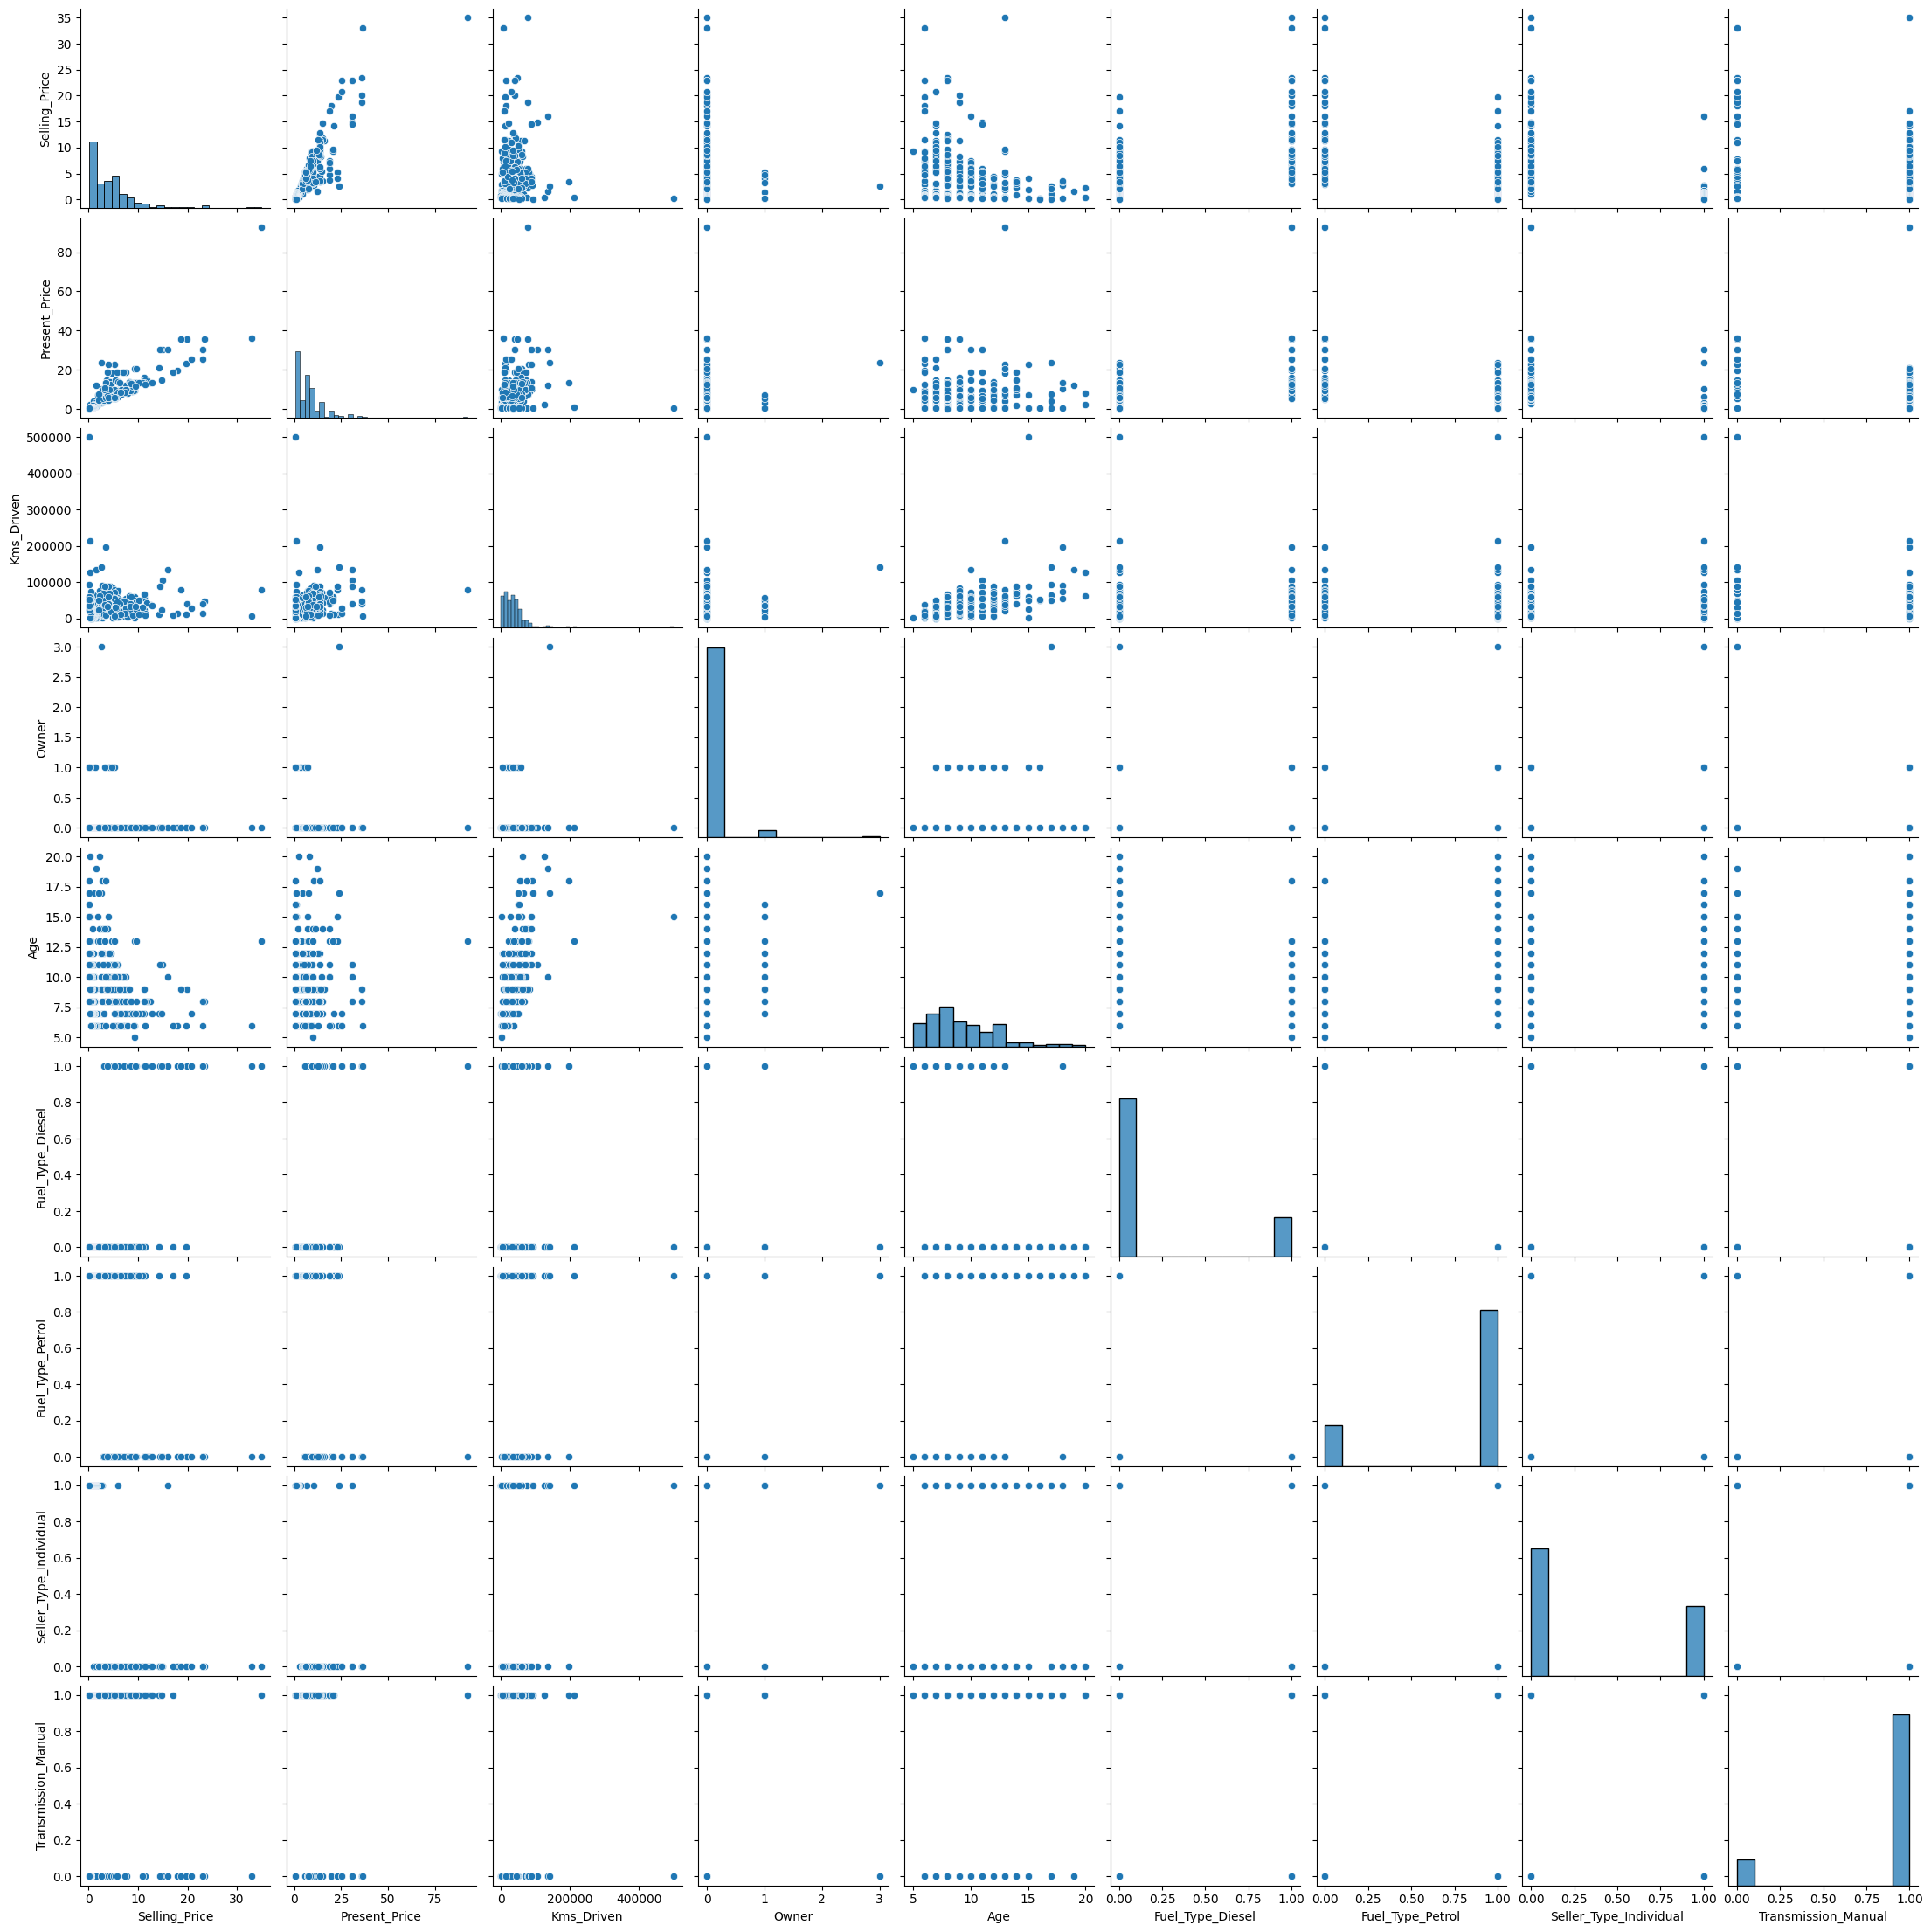

In [75]:
sns.pairplot(final_dataset)

In [76]:
final_dataset

,Selling_Price,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,9,False,True,False,True
1,4.75,9.54,43000,0,10,True,False,False,True
2,7.25,9.85,6900,0,6,False,True,False,True
3,2.85,4.15,5200,0,12,False,True,False,True
4,4.60,6.87,42450,0,9,True,False,False,True
...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,0,7,True,False,False,True
297,4.00,5.90,60000,0,8,False,True,False,True
298,3.35,11.00,87934,0,14,False,True,False,True
299,11.50,12.50,9000,0,6,True,False,False,True


In [77]:
final_dataset.iloc[:,0]

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [78]:
X= final_dataset.iloc[:,1:]
Y = final_dataset.iloc[:,0] 

In [79]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,9,False,True,False,True
1,4.75,9.54,43000,0,10,True,False,False,True
2,7.25,9.85,6900,0,6,False,True,False,True
3,2.85,4.15,5200,0,12,False,True,False,True
4,4.60,6.87,42450,0,9,True,False,False,True


In [80]:
X.head()

,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,9,False,True,False,True
1,9.54,43000,0,10,True,False,False,True
2,9.85,6900,0,6,False,True,False,True
3,4.15,5200,0,12,False,True,False,True
4,6.87,42450,0,9,True,False,False,True


In [81]:
Y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

/Users/mehmetomer/Library/Python/3.9/lib/python/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/mehmetomer/Library/Python/3.9/lib/python/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/var/folders/jz/07bdb46x19b9356jqrpcm91m0000gn/T/ipykernel_59962/119878309.py:10: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(
/Users/mehmetomer/Library/Python/3.9/lib/python/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


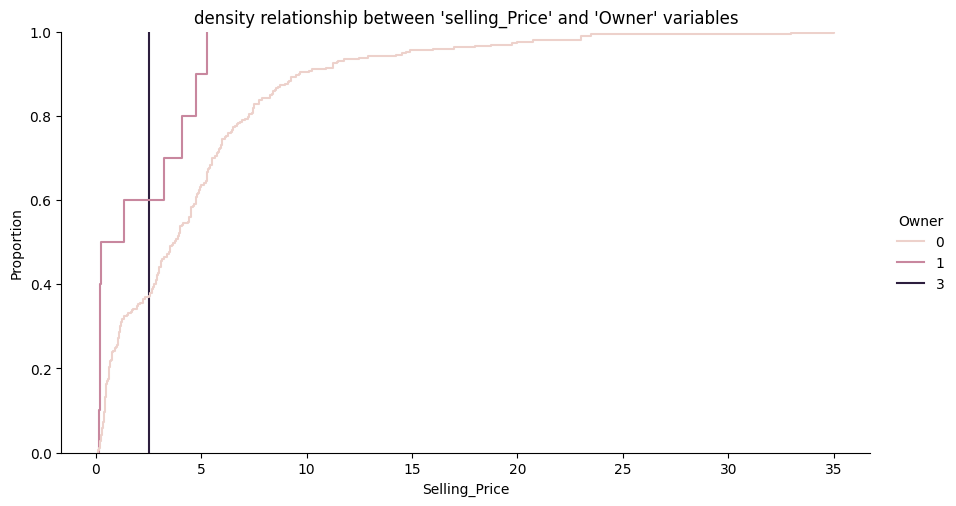

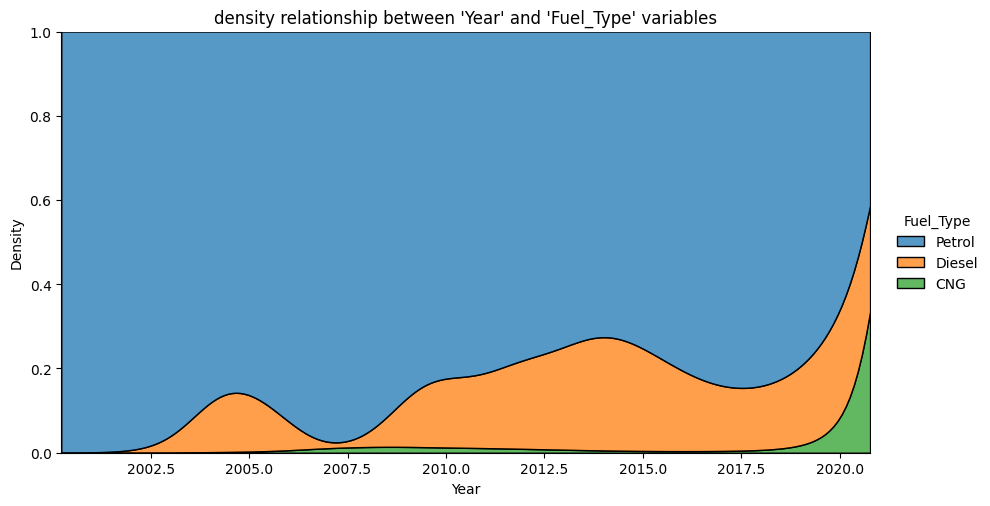

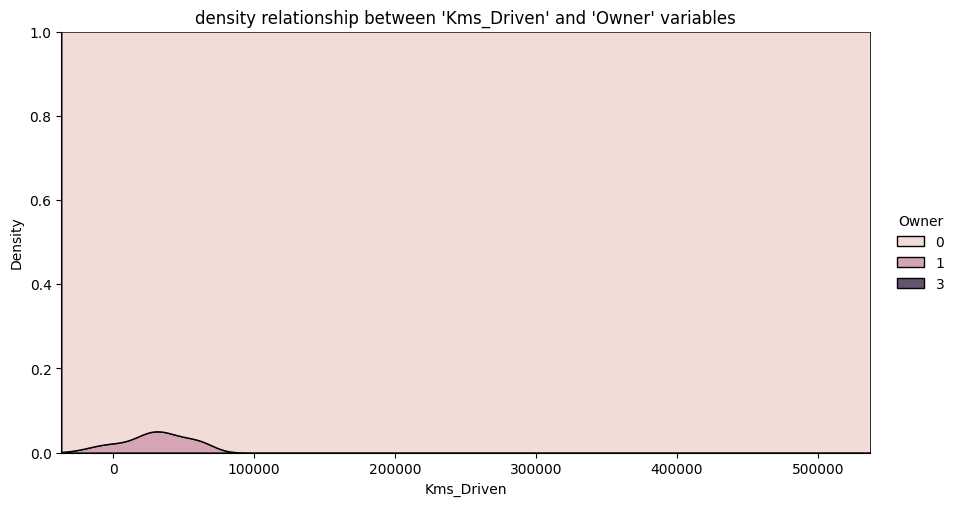

In [82]:
sns.displot(
    data = df, x = "Selling_Price", hue = "Owner",
    kind = "ecdf", height = 5, aspect = 1.8).set(title =  "density relationship between 'selling_Price' and 'Owner' variables");

sns.displot(
    data = df, x = "Year", hue = "Fuel_Type",
    kind = "kde", height = 5, aspect = 1.8, multiple="fill").set(title = "density relationship between 'Year' and 'Fuel_Type' variables");


sns.displot(
    data = df, x = "Kms_Driven", hue = "Owner",
    kind = "kde", height = 5, aspect = 1.8, multiple="fill").set(title = "density relationship between 'Kms_Driven' and 'Owner' variables");

In [83]:
from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor()
model.fit(X,Y)

ExtraTreesRegressor()

In [84]:
print(model.feature_importances_)

[0.40167611 0.03798716 0.00091639 0.08320948 0.22088785 0.00528117
 0.12560174 0.1244401 ]


Categorical Variables Univariate Analysis

<Axes: xlabel='Fuel_Type', ylabel='count'>

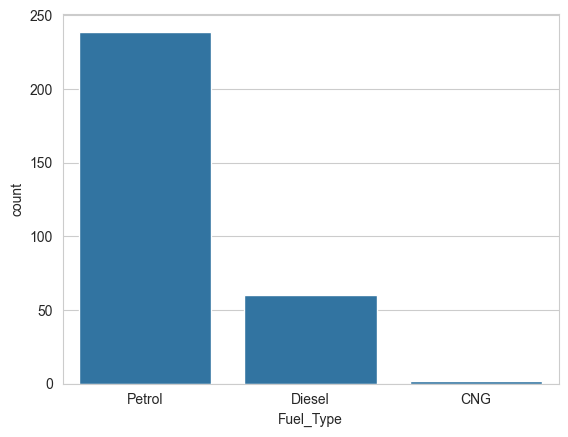

In [85]:
sns.set_style('whitegrid')

sns.countplot(x='Fuel_Type', data=df)

<Axes: xlabel='Seller_Type', ylabel='count'>

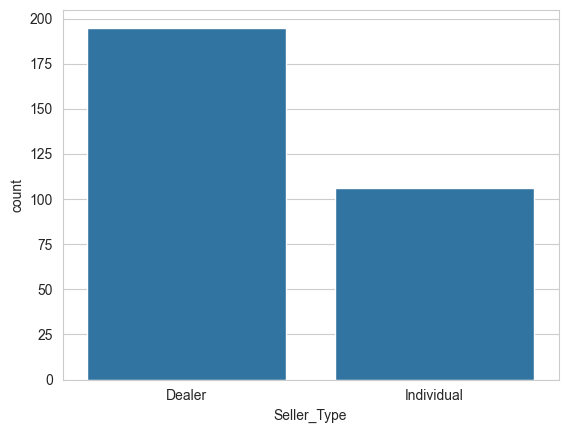

In [86]:
sns.set_style('whitegrid')

sns.countplot(x='Seller_Type',data=df)



<Axes: xlabel='Transmission', ylabel='count'>

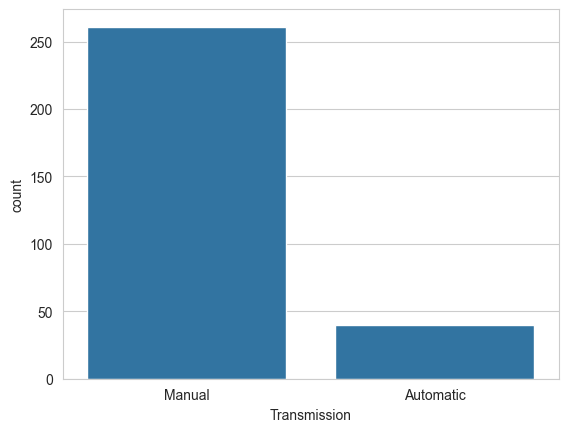

In [87]:
sns.set_style('whitegrid')

sns.countplot(x='Transmission',data=df)

/var/folders/jz/07bdb46x19b9356jqrpcm91m0000gn/T/ipykernel_59962/2539874899.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Kms_Driven'].dropna(),kde=False,color='darkred',bins=43)


<Axes: xlabel='Kms_Driven'>

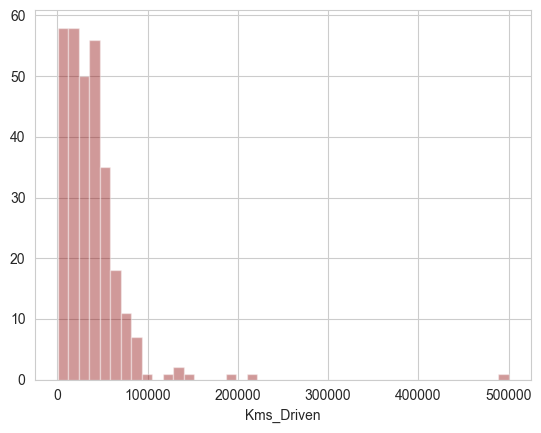

In [88]:
sns.distplot(df['Kms_Driven'].dropna(),kde=False,color='darkred',bins=43)



/var/folders/jz/07bdb46x19b9356jqrpcm91m0000gn/T/ipykernel_59962/1808526861.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Present_Price'].dropna(),kde=False,color='darkblue',bins=43)


<Axes: xlabel='Present_Price'>

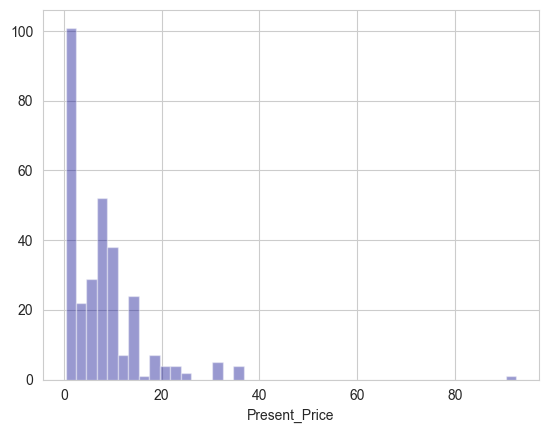

In [89]:
sns.distplot(df['Present_Price'].dropna(),kde=False,color='darkblue',bins=43)



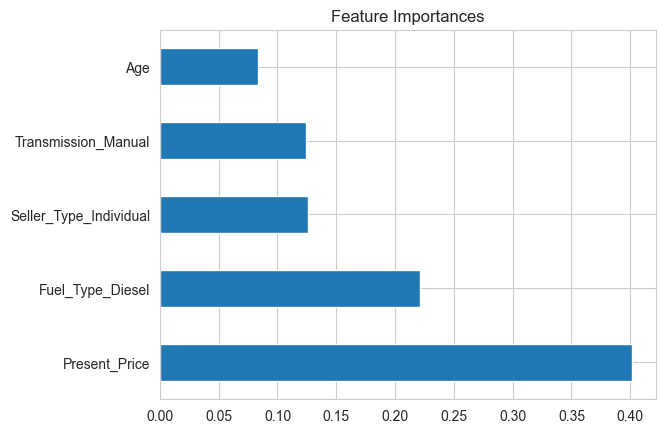

In [90]:
#plot graph of   better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.title('Feature Importances')
plt.show()

In [91]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)


In [92]:
X_train.shape

(240, 8)

In [93]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor()

In [94]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [95]:
 #Randomized Search CV
# Number of features to consider at every split
max_features = ['auto', 'sqrt'] # we first consider all the featurees and 
#then sqare root number of features to train the model

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
#we create trees with 5 10 15 for each model...and train it

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# we split as 2 nodes forst then 5 then 10 like that till 100 from the list

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]


In [96]:
max_depth

[5, 10, 15, 20, 25, 30]

In [97]:
from sklearn.model_selection import RandomizedSearchCV
#Randomized search on hyper parameters.
#used to select the best parameter for the model

In [98]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [99]:
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [100]:
#rf = object of the regressor 
#param_distributions = Dictionary with parameters names as keys and parameters as vlaues 
#scoring = metric that we used to evaluate the performance of the cross-validated model on the test set. 
#we used negative mean squared error.
#cv = 5 fold cross validation
#n_jobs = no of cores to use

In [101]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   0.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   0.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

/Users/mehmetomer/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/mehmetomer/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mehmetomer/Library/Python/3.9/lib/python/site-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/Users/mehmetomer/Library/Python/3.9/lib/python/site-packages/sklearn/base.py", line 638, in _validate_params
    validat

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [102]:
 rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [103]:
 rf_random.best_score_

-4.257087847639685

In [104]:
predictions=rf_random.predict(X_test)

In [105]:
predictions1=rf_random.predict(X_train)

/var/folders/jz/07bdb46x19b9356jqrpcm91m0000gn/T/ipykernel_59962/2131792714.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-predictions)


<Axes: xlabel='Selling_Price', ylabel='Density'>

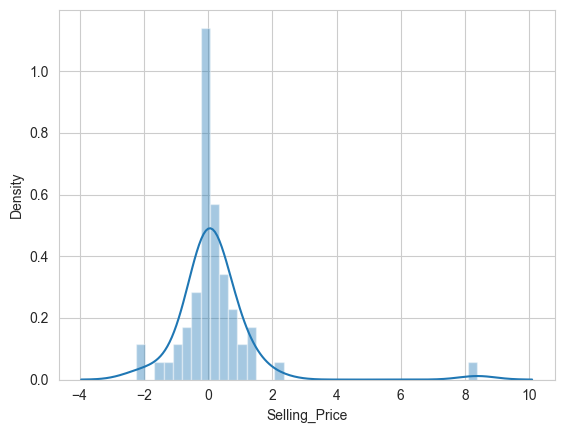

In [106]:
sns.distplot(y_test-predictions)

/Users/mehmetomer/Library/Python/3.9/lib/python/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


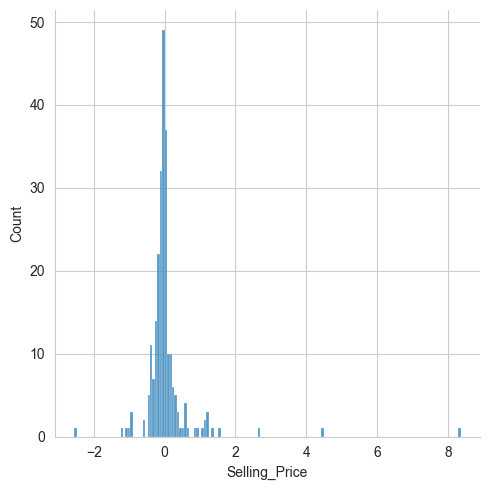

In [107]:
sns.displot(y_train-predictions1)

In [108]:
#form the plot we can see that almost all the values predicted are correct by comparing the diff between the y_test
#predicted value and we see from the normal distribution of the graph that not much of the samples have varied
#much from the actual value

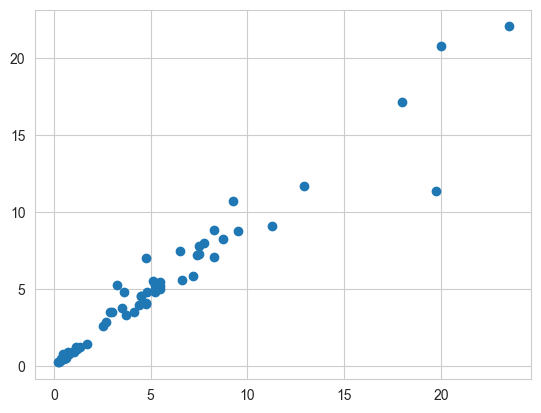

In [109]:
plt.scatter(y_test,predictions)

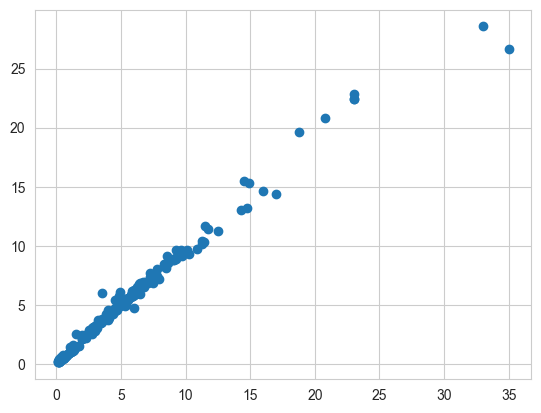

In [110]:
plt.scatter(y_train,predictions1)

In [111]:
#even from this points plot we can see that almost all the points are along the 
#line y=x which says that the predicted and the y_test values are smae

In [112]:
import pickle
# open a file, where you ant to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)
#we use a pickle file to store the data in a byte stream format

In [113]:
mse = mean_squared_error(y_test,predictions)
rmse = np.sqrt(mse)
print("RMSE : {:.2f}".format(rmse))

RMSE : 1.30


In [114]:
from sklearn.metrics import r2_score
r = r2_score(y_test, predictions)
print("R2 score : {}" . format(r))

R2 score : 0.9334691063933432


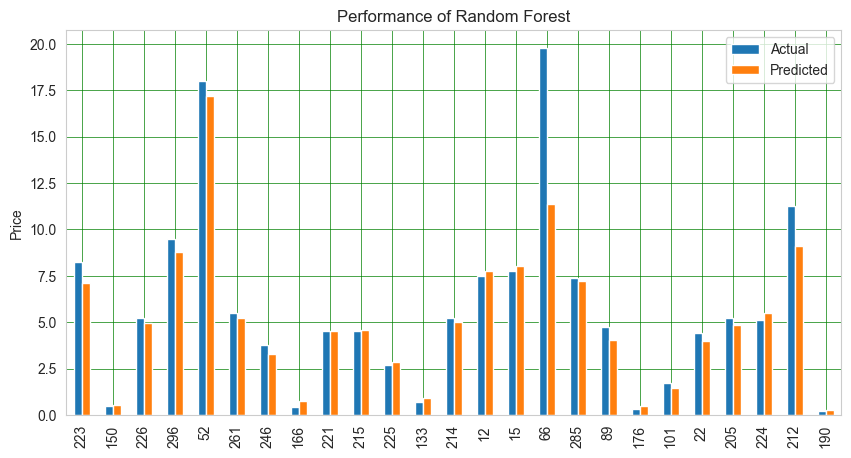

In [115]:
df_check = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
df_check = df_check.head(25)
#round(df_check,2)
df_check.plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.title('Performance of Random Forest')
plt.ylabel('Price')
plt.show()

In [116]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
mse_predict = round(mean_squared_error(y_test,predictions),4)
mae_predict = round(mean_absolute_error(y_test,predictions),4)
print ('MSE is:'+str(mse_predict))
print ('MAE is:'+str(mae_predict))

MSE is:1.6817
MAE is:0.6163


In [117]:
import warnings
warnings.filterwarnings("ignore")

In [118]:
cutoff = 1.8                              # decide on a cutoff limit
y_pred_classes = np.zeros_like(predictions)
y_test_classes = np.zeros_like(predictions)     # initialise a matrix full with zeros
y_pred_classes[abs(y_test - predictions) > cutoff] = 1  

In [119]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)

Text(0.5, 1.0, 'Confusion Matrix')

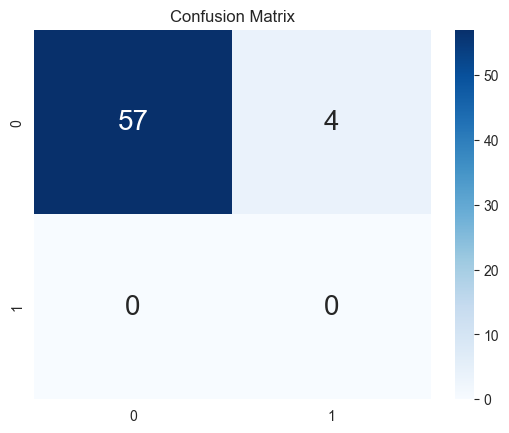

In [120]:
df_cm = cm
sns.heatmap(df_cm,annot=True,cmap="Blues" ,annot_kws={"size": 20})
plt.title('Confusion Matrix')

In [121]:
matrix = classification_report(y_test_classes, y_pred_classes)
print(matrix)

              precision    recall  f1-score   support

         0.0       1.00      0.93      0.97        61
         1.0       0.00      0.00      0.00         0

    accuracy                           0.93        61
   macro avg       0.50      0.47      0.48        61
weighted avg       1.00      0.93      0.97        61



In [122]:
s = accuracy_score(y_test_classes,y_pred_classes)
print("accuracy of the model : {}" . format(s))

accuracy of the model : 0.9344262295081968


# Mehmet Omer Demir
##Thanks